In [1]:
from pipeline import Pipeline
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.options.display.float_format = '{:.5f}'.format

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
pipeline = Pipeline()
df = pipeline.run_pipeline()

/Users/samuelwong/Projects/PropertyGuru Analysis/Web Scraping/Working


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 0 to 5489
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4390 non-null   int64  
 1   price                4380 non-null   float64
 2   sqft                 4350 non-null   float64
 3   bedrooms             4326 non-null   float64
 4   bathrooms            4318 non-null   float64
 5   listing_tags         4390 non-null   object 
 6   furnishing           3227 non-null   object 
 7   tenure               3850 non-null   object 
 8   state                4390 non-null   object 
 9   district             4390 non-null   object 
 10  landed_vs_high_rise  4390 non-null   object 
 11  pool                 4390 non-null   bool   
 12  fitness              4390 non-null   bool   
 13  balcony              4390 non-null   bool   
 14  log_price            4380 non-null   float64
dtypes: bool(3), float64(5), int64(1), obje

In [4]:
df.set_index('id', inplace = True)

In [5]:
df_ori = df.copy()

In [6]:
df['price_div'] = df.price.div(1000)

In [7]:
df

,price,sqft,bedrooms,bathrooms,listing_tags,furnishing,tenure,state,district,landed_vs_high_rise,pool,fitness,balcony,log_price,price_div
id,,,,,,,,,,,,,,,
1,1288000.00000,2622.00000,5.00000,5.00000,2-storey Terraced House,Partially Furnished,Leasehold,Selangor,Kuala Langat,landed,True,True,True,14.06860,1288.00000
2,1600000.00000,1847.00000,5.00000,5.00000,3-storey Terraced House,Unfurnished,Leasehold,Selangor,Puchong,landed,True,False,True,14.28551,1600.00000
3,400000.00000,1100.00000,3.00000,2.00000,Condominium,Partially Furnished,Leasehold,Selangor,Ampang,high-rise,False,False,True,12.89922,400.00000
4,665000.00000,1535.00000,4.00000,3.00000,2-storey Terraced House,Unfurnished,Freehold,Selangor,Klang,landed,False,False,False,13.40754,665.00000
5,599000.00000,1900.00000,4.00000,3.00000,2-storey Terraced House,Unfurnished,Leasehold,Selangor,Bangi,landed,True,False,False,13.30302,599.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,980000.00000,2750.00000,5.00000,5.00000,Cluster House,NaN,Freehold,Selangor,Semenyih,landed,True,True,False,13.79531,980.00000
4387,880000.00000,1084.00000,3.00000,2.00000,Service Residence,Partially Furnished,Leasehold,Selangor,Damansara,high-rise,True,True,False,13.68768,880.00000
4388,2100000.00000,3530.00000,6.00000,5.00000,Semi-Detached House,Unfurnished,Leasehold,Selangor,Ampang,landed,True,True,False,14.55745,2100.00000


## Impute missing values

In [8]:
missing_prop = (df.isna().sum()) / df.shape[0] * 100
missing_prop.sort_values(ascending = False)

furnishing            26.49203
tenure                12.30068
bathrooms              1.64009
bedrooms               1.45786
sqft                   0.91116
price                  0.22779
log_price              0.22779
price_div              0.22779
listing_tags           0.00000
state                  0.00000
district               0.00000
landed_vs_high_rise    0.00000
pool                   0.00000
fitness                0.00000
balcony                0.00000
dtype: float64

In [9]:
target_cols = missing_prop[(missing_prop <= 2)].index.tolist()

In [10]:
df = df.dropna(axis = 0, how = 'any', subset = target_cols)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 1 to 4390
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                4290 non-null   float64
 1   sqft                 4290 non-null   float64
 2   bedrooms             4290 non-null   float64
 3   bathrooms            4290 non-null   float64
 4   listing_tags         4290 non-null   object 
 5   furnishing           3205 non-null   object 
 6   tenure               3762 non-null   object 
 7   state                4290 non-null   object 
 8   district             4290 non-null   object 
 9   landed_vs_high_rise  4290 non-null   object 
 10  pool                 4290 non-null   bool   
 11  fitness              4290 non-null   bool   
 12  balcony              4290 non-null   bool   
 13  log_price            4290 non-null   float64
 14  price_div            4290 non-null   float64
dtypes: bool(3), float64(6), object(6)
memo

In [12]:
print(f'Number of rows removed: {df_ori.shape[0] - df.shape[0]}')

Number of rows removed: 100


### Furnishing

<AxesSubplot:>

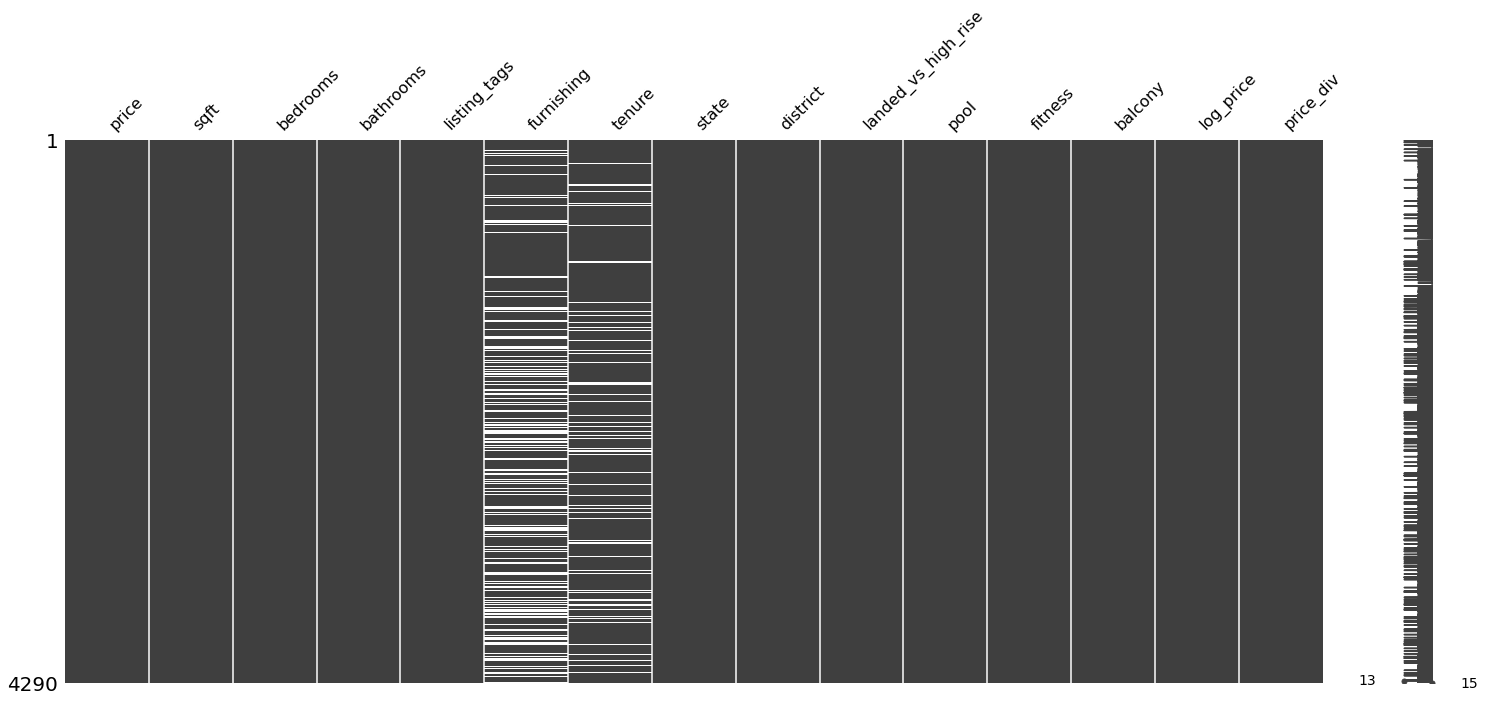

In [13]:
msno.matrix(df.sort_values(by = 'landed_vs_high_rise'))

In [14]:
df_landed = df[df.landed_vs_high_rise == 'landed']
df_high_rise = df[df.landed_vs_high_rise == 'high-rise']

In [15]:
df_landed['furnishing'].mode()

0    Unfurnished
Name: furnishing, dtype: object

In [16]:
df_high_rise['furnishing'].mode()

0    Partially Furnished
Name: furnishing, dtype: object

In [17]:
df['furnishing'].mode().values[0]

'Partially Furnished'

In [18]:
df[df.landed_vs_high_rise == 'landed']['furnishing'].isna()

id
1       False
2       False
4       False
5       False
6        True
        ...  
4384    False
4385    False
4386     True
4388    False
4389    False
Name: furnishing, Length: 3065, dtype: bool

In [19]:
furn_id_na = df[df['furnishing'].isna()].index.tolist()

In [20]:
for i, row in df.iterrows():
    if i in furn_id_na:
        if row['landed_vs_high_rise'] == 'landed':
            df.loc[i,'furnishing'] = df_landed['furnishing'].mode().values[0]
        elif row['landed_vs_high_rise'] == 'high-rise':
            df.loc[i,'furnishing'] = df_high_rise['furnishing'].mode().values[0]
    else:
        pass

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 1 to 4390
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                4290 non-null   float64
 1   sqft                 4290 non-null   float64
 2   bedrooms             4290 non-null   float64
 3   bathrooms            4290 non-null   float64
 4   listing_tags         4290 non-null   object 
 5   furnishing           4290 non-null   object 
 6   tenure               3762 non-null   object 
 7   state                4290 non-null   object 
 8   district             4290 non-null   object 
 9   landed_vs_high_rise  4290 non-null   object 
 10  pool                 4290 non-null   bool   
 11  fitness              4290 non-null   bool   
 12  balcony              4290 non-null   bool   
 13  log_price            4290 non-null   float64
 14  price_div            4290 non-null   float64
dtypes: bool(3), float64(6), object(6)
memo

we can see that the number of missing furnishing values in landed is more 4 times more than the the high-rise listings.

- First option => impute the mode class
- 2nd option => impute based on the price range

In [22]:
df['tenure'].fillna(df['tenure'].mode().values[0], inplace = True)

/var/folders/ss/52sqv29j2zdgspf8_wh7wppm0000gn/T/ipykernel_791/3836525955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure'].fillna(df['tenure'].mode().values[0], inplace = True)


In [23]:
df.isna().sum()

price                  0
sqft                   0
bedrooms               0
bathrooms              0
listing_tags           0
furnishing             0
tenure                 0
state                  0
district               0
landed_vs_high_rise    0
pool                   0
fitness                0
balcony                0
log_price              0
price_div              0
dtype: int64

# EDA

In [24]:
## Target class

<AxesSubplot:xlabel='price', ylabel='Count'>

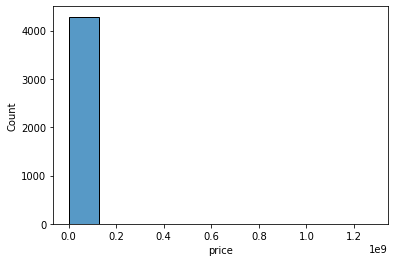

In [25]:
sns.histplot(data = df, x = 'price', bins = 10)

We can see that there is an outlier with extremely high house price

In [26]:
df.sort_values(by = 'price', ascending = False)

,price,sqft,bedrooms,bathrooms,listing_tags,furnishing,tenure,state,district,landed_vs_high_rise,pool,fitness,balcony,log_price,price_div
id,,,,,,,,,,,,,,,
2470,1280000000.00000,2407.00000,4.00000,4.00000,Semi-Detached House,Unfurnished,Freehold,Selangor,Puchong,landed,False,False,False,20.97013,1280000.00000
2479,1280000000.00000,2407.00000,4.00000,4.00000,Semi-Detached House,Unfurnished,Freehold,Selangor,Puchong,landed,False,False,False,20.97013,1280000.00000
2010,12000000.00000,17000.00000,8.00000,8.00000,Bungalow House,Unfurnished,Freehold,Selangor,Ampang,landed,False,False,False,16.30042,12000.00000
1938,12000000.00000,17000.00000,8.00000,8.00000,Bungalow House,Unfurnished,Freehold,Selangor,Ampang,landed,False,False,False,16.30042,12000.00000
704,11500000.00000,20000.00000,9.00000,9.00000,Bungalow House,Partially Furnished,Freehold,Selangor,Kajang,landed,False,False,True,16.25786,11500.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,95000.00000,650.00000,3.00000,2.00000,Apartment,Partially Furnished,Freehold,Selangor,Sungai Buloh,high-rise,False,False,False,11.46163,95.00000
162,88000.00000,889.00000,2.00000,2.00000,Condominium,Partially Furnished,Freehold,Selangor,Cyberjaya,high-rise,False,False,False,11.38509,88.00000
454,88000.00000,889.00000,2.00000,2.00000,Condominium,Partially Furnished,Freehold,Selangor,Cyberjaya,high-rise,False,False,False,11.38509,88.00000


Can assume that the listings are wrong

In [27]:
drop_rows = df[df.price > 100_000_000].index.tolist()

df = df.drop(drop_rows)

<AxesSubplot:xlabel='price', ylabel='Count'>

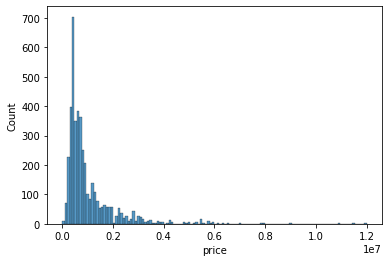

In [28]:
sns.histplot(data = df, x = 'price')

can see that the distribution of house price is extremely skewed, can apply log transformation

<AxesSubplot:xlabel='log_price', ylabel='Count'>

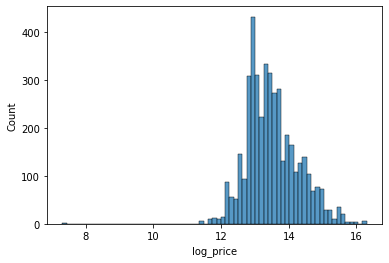

In [29]:
sns.histplot(data = df, x = 'log_price')

<AxesSubplot:>

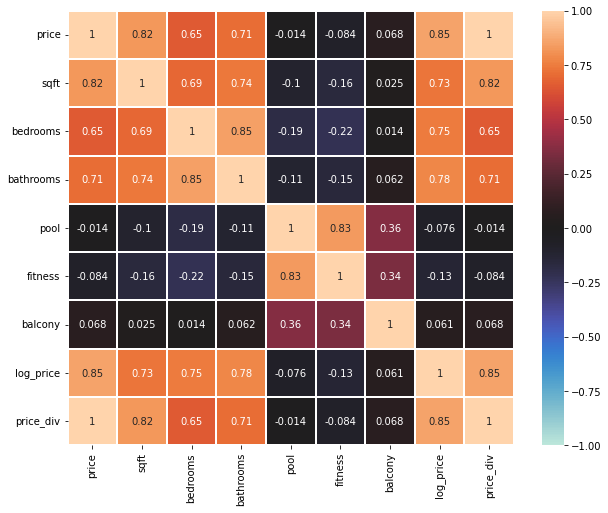

In [30]:
fig, ax = plt.subplots(figsize = (10,8))

sns.heatmap(df.corr(), annot=True, linewidths=2, center=0, vmax=1, vmin = -1)

<AxesSubplot:xlabel='sqft', ylabel='price'>

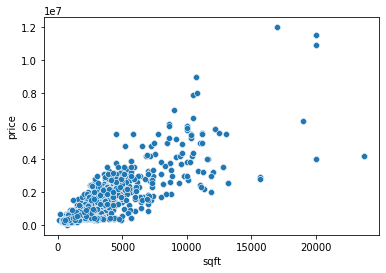

In [31]:
sns.scatterplot(data=df, x = 'sqft', y = 'price')

<AxesSubplot:xlabel='bedrooms'>

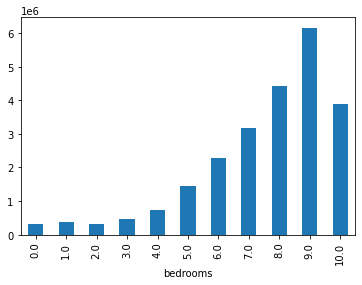

In [32]:
df.groupby('bedrooms')['price'].mean().plot(kind= 'bar')

<AxesSubplot:xlabel='bathrooms'>

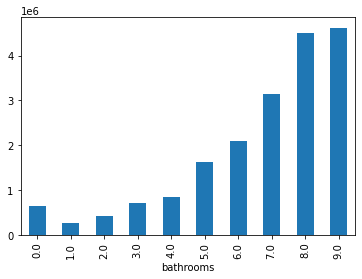

In [33]:
df.groupby('bathrooms')['price'].mean().plot(kind= 'bar')

<AxesSubplot:>

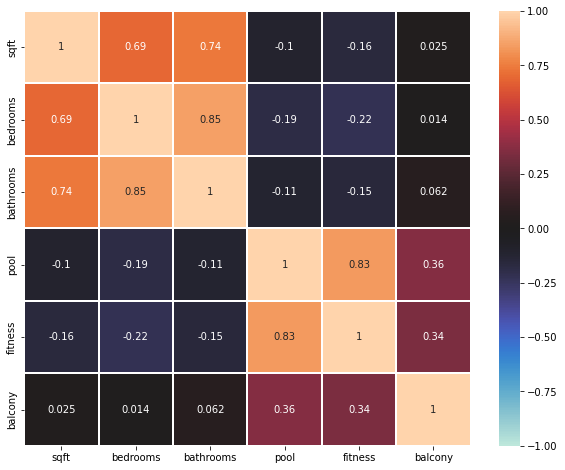

In [34]:
fig, ax = plt.subplots(figsize = (10,8))

sns.heatmap(df.drop(columns = ['price', 'price_div', 'log_price']).corr(), annot=True, linewidths=2, center=0, vmax=1, vmin = -1)

In [35]:
df['listing_tags'].value_counts()

2-storey Terraced House      1592
Condominium                   644
Semi-Detached House           496
Bungalow House                432
Service Residence             252
Apartment                     199
3-storey Terraced House       149
Terraced House                122
1-storey Terraced House       104
2.5-storey Terraced House      80
Townhouse                      56
Cluster House                  38
Flat                           26
Duplex                         26
1.5-storey Terraced House      16
Zero-Lot Bungalow              12
Link Bungalow                  10
Penthouse                      10
Studio                          8
Twin Courtyard Villa            6
Townhouse Condo                 4
4.5-storey Terraced House       4
Twin Villa                      2
Name: listing_tags, dtype: int64

In [36]:
a = {}

for val in df['listing_tags'].unique():
    a[val] = val
    
a

{'2-storey Terraced House': '2-storey Terraced House',
 '3-storey Terraced House': '3-storey Terraced House',
 'Condominium': 'Condominium',
 '1-storey Terraced House': '1-storey Terraced House',
 'Apartment': 'Apartment',
 'Bungalow House': 'Bungalow House',
 'Service Residence': 'Service Residence',
 'Semi-Detached House': 'Semi-Detached House',
 '2.5-storey Terraced House': '2.5-storey Terraced House',
 'Terraced House': 'Terraced House',
 'Townhouse': 'Townhouse',
 'Duplex': 'Duplex',
 '1.5-storey Terraced House': '1.5-storey Terraced House',
 'Zero-Lot Bungalow': 'Zero-Lot Bungalow',
 'Cluster House': 'Cluster House',
 'Studio': 'Studio',
 'Flat': 'Flat',
 'Link Bungalow': 'Link Bungalow',
 'Twin Villa': 'Twin Villa',
 'Twin Courtyard Villa': 'Twin Courtyard Villa',
 'Townhouse Condo': 'Townhouse Condo',
 'Penthouse': 'Penthouse',
 '4.5-storey Terraced House': '4.5-storey Terraced House'}

In [37]:
listings_tag_map = {
     '2-storey Terraced House': '2-storey Terraced House',
     '3-storey Terraced House': '3-storey Terraced House',
     'Condominium': 'Condominium',
     '1-storey Terraced House': '1-storey Terraced House',
     'Apartment': 'Apartment',
     'Bungalow House': 'Bungalow House',
     'Service Residence': 'Service Residence',
     'Semi-Detached House': 'Semi-Detached House',
     '2.5-storey Terraced House': '2.5-storey Terraced House',
     'Terraced House': 'Terraced House',
     'Townhouse': 'Townhouse',
     'Duplex': 'Duplex',
     '1.5-storey Terraced House': '1.5-storey Terraced House',
     'Zero-Lot Bungalow': 'Zero-Lot Bungalow',
     'Cluster House': 'Cluster House',
     'Studio': 'Studio',
     'Flat': 'Flat',
     'Link Bungalow': 'Link Bungalow',
     'Twin Villa': 'Villa',
     'Twin Courtyard Villa': 'Villa',
     'Townhouse Condo': 'Townhouse',
     'Penthouse': 'Penthouse',
     '4.5-storey Terraced House': '4.5-storey Terraced House'
}

df['listing_tags'] = df['listing_tags'].map(listings_tag_map)

In [38]:
df.groupby('listing_tags')['price'].mean().sort_values(ascending = False)

listing_tags
Bungalow House              3067540.64815
Villa                       2827700.00000
Link Bungalow               2284000.00000
4.5-storey Terraced House   2280000.00000
Zero-Lot Bungalow           2251666.66667
Semi-Detached House         1671104.35081
3-storey Terraced House     1141380.67114
2.5-storey Terraced House   1128864.20000
Cluster House                917651.57895
Penthouse                    804599.80000
Terraced House               795072.31148
2-storey Terraced House      681888.44347
Townhouse                    648410.00000
Duplex                       637415.38462
Service Residence            548882.17460
1.5-storey Terraced House    500124.87500
Condominium                  495680.00311
1-storey Terraced House      435940.13462
Studio                       386722.00000
Apartment                    360626.12060
Flat                         149846.15385
Name: price, dtype: float64

In [39]:
df.describe()

,price,sqft,bedrooms,bathrooms,log_price,price_div
count,4288.00000,4288.00000,4288.00000,4288.00000,4288.00000,4288.00000
mean,1018332.91325,2589.10354,4.11101,3.57020,13.50732,1018.33291
std,1069185.51603,2223.03636,1.26417,1.57725,0.76640,1069.18552
min,1500.00000,120.00000,0.00000,0.00000,7.31322,1.50000
25%,425000.00000,1266.00000,3.00000,2.00000,12.95984,425.00000
50%,670000.00000,2000.00000,4.00000,3.00000,13.41503,670.00000
75%,1200000.00000,3050.00000,5.00000,4.00000,13.99783,1200.00000
max,12000000.00000,23725.00000,10.00000,9.00000,16.30042,12000.00000


In [40]:
df.groupby('district')['price'].mean().sort_values(ascending = False)

district
Hulu Kelang      2771400.00000
Ampang           2034380.92424
Ulu Klang        1352800.00000
Sungai Buloh     1341442.75862
Beranang         1280000.00000
Subang Jaya      1261509.97761
Shah Alam        1247047.83045
Damansara        1137636.20833
Kajang           1135257.47449
Petaling Jaya    1082618.91979
Subang           1013369.15385
Kuala Langat      847843.75000
Cheras            830242.62295
Puchong           821683.49164
Kuala Selangor    809700.00000
Bangi             794953.49438
Klang             726052.59477
Seri Kembangan    707344.62385
Gombak            692406.21875
Cyberjaya         662360.70455
Semenyih          644306.87324
Rawang            615635.55000
Putrajaya         579986.00000
Sepang            559951.73869
Hulu Langat       515000.00000
Hulu Selangor     494549.37500
Sabak Bernam      300000.00000
Nilai             298694.28571
Name: price, dtype: float64

- linear models will use OneHotEncoder as OrdinalEncoder will introduce ordered's relationship between classes
- for tree-based models like RandomForest or GradientBoosting method will use OrdinalEncoder

In [41]:
df.drop(columns = ['log_price', 'price_div', 'state']).to_csv('clean_data.csv')

In [42]:
target = 'log_price'
y = df[target]
X = df.drop(columns = ['price','log_price', 'price_div', 'state'])

In [43]:
X = pd.get_dummies(X)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4288 entries, 1 to 4390
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sqft                                    4288 non-null   float64
 1   bedrooms                                4288 non-null   float64
 2   bathrooms                               4288 non-null   float64
 3   pool                                    4288 non-null   bool   
 4   fitness                                 4288 non-null   bool   
 5   balcony                                 4288 non-null   bool   
 6   listing_tags_1-storey Terraced House    4288 non-null   uint8  
 7   listing_tags_1.5-storey Terraced House  4288 non-null   uint8  
 8   listing_tags_2-storey Terraced House    4288 non-null   uint8  
 9   listing_tags_2.5-storey Terraced House  4288 non-null   uint8  
 10  listing_tags_3-storey Terraced House    4288 non-null   uint

In [45]:
from sklearn.preprocessing import OneHotEncoder

lr = make_pipeline(StandardScaler(), LinearRegression(n_jobs = -1))
lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(n_jobs=-1))])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [48]:
lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(n_jobs=-1))])

In [49]:
print(f'MAE train score : {mean_absolute_error(y_train, lr.predict(X_train))}')

MAE train score : 0.24848285143982315


In [50]:
print(f'MAE valid score : {mean_absolute_error(y_valid, lr.predict(X_valid))}')

MAE valid score : 0.2541386443343688


In [51]:
import numpy as np
print(f'MSE train score : {mean_squared_error(y_train, lr.predict(X_train))}')

MSE train score : 0.1172048246800363


In [52]:
print(f'MSE valid score : {mean_squared_error(y_valid, lr.predict(X_valid))}')

MSE valid score : 0.11120657326059377


In [53]:
import numpy as np
print(f'RMSE train score : {np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))}')

RMSE train score : 0.3423519018203876


In [54]:
print(f'RMSE valid score : {np.sqrt(mean_squared_error(y_valid, lr.predict(X_valid)))}')

RMSE valid score : 0.3334764958143134


In [55]:
print(f'R2 train score : {r2_score(y_train, lr.predict(X_train))}')

R2 train score : 0.7959107214694517


In [56]:
print(f'R2 valid score : {r2_score(y_valid, lr.predict(X_valid))}')

R2 valid score : 0.8027410785118267


In [57]:
### Try different models
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 0.1)
lr = LinearRegression()

scores = []
models = {
    'Linear Regression': lr,
    'Ridge': ridge,
    'Lasso': lasso
}

for model in models.keys():
    reg = make_pipeline(StandardScaler(), models[model])
    
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_valid_pred = reg.predict(X_valid)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)
    
    scores.append([model, mae_train, mae_valid, mse_train, mse_valid, rmse_train, rmse_valid, r2_train, r2_valid])

In [58]:
scores

[['Linear Regression',
  0.24848285143982315,
  0.2541386443343688,
  0.1172048246800363,
  0.11120657326059377,
  0.3423519018203876,
  0.3334764958143134,
  0.7959107214694517,
  0.8027410785118267],
 ['Ridge',
  0.24837093346939237,
  0.2539729146176364,
  0.117135890743488,
  0.11097840461934737,
  0.3422512099956522,
  0.3331342141229978,
  0.7960307564374218,
  0.8031458054876703],
 ['Lasso',
  0.33978852121861514,
  0.3537619337515769,
  0.1944672358502502,
  0.1951141084205671,
  0.4409843941119121,
  0.4417172267645525,
  0.6613733438802049,
  0.653905363094163]]

In [59]:
### try tune ridge model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer

params = {'ridge__alpha': [0.001,0.01,0.1,0.5, 1,5, 10,15,100]}
model = make_pipeline(MinMaxScaler(), Ridge())
gridcv = GridSearchCV(model, params, scoring = 'neg_mean_absolute_error', n_jobs=-1, cv = 10, verbose = 1, return_train_score=True)

In [60]:
gridcv.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15,
                                          100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
gridcv.best_params_

{'ridge__alpha': 0.001}

In [62]:
results = pd.DataFrame(gridcv.cv_results_)
results = results[['mean_fit_time', 'param_ridge__alpha', 'mean_test_score','mean_train_score','rank_test_score']]

In [63]:
results.sort_values(by = 'rank_test_score')

,mean_fit_time,param_ridge__alpha,mean_test_score,mean_train_score,rank_test_score
0,0.03278,0.00100,-0.25384,-0.24808,1
1,0.03012,0.01000,-0.25385,-0.24809,2
2,0.03217,0.10000,-0.25391,-0.24819,3
3,0.02778,0.50000,-0.25419,-0.24861,4
4,0.02474,1,-0.25461,-0.24915,5
5,0.03139,5,-0.25898,-0.25389,6
6,0.03153,10,-0.26336,-0.25859,7
7,0.03982,15,-0.26699,-0.26245,8
8,0.03624,100,-0.30740,-0.30432,9


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

preprocesses = {
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
    'stdscaler': StandardScaler(),
    'Normalizer': Normalizer()
}

ridge = Ridge(alpha = 0.001, random_state=42)
lasso = Lasso(alpha = 0.1, random_state=42)
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

scores = []
models = {
    'Linear Regression': lr,
    'Ridge': ridge,
    'Lasso': lasso,
    'rf': rf,
    'gb': gb
}

for model in models.keys():
    for preprocess in preprocesses.keys():
        reg = make_pipeline(preprocesses[preprocess], models[model])

        reg.fit(X_train, y_train)
        y_train_pred = reg.predict(X_train)
        y_valid_pred = reg.predict(X_valid)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_valid = mean_absolute_error(y_valid, y_valid_pred)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_valid = mean_squared_error(y_valid, y_valid_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
        r2_train = r2_score(y_train, y_train_pred)
        r2_valid = r2_score(y_valid, y_valid_pred)

        scores.append([preprocess, model, mae_train, mae_valid, mse_train, mse_valid, rmse_train, rmse_valid, r2_train, r2_valid])

In [65]:
outputs = pd.DataFrame(scores, columns = ['preprocesser', 'model','mae_train','mae_valid','mse_train','mse_valid',
                                    'rmse_train', 'rmse_valid','r2_train','r2_valid'])

outputs.sort_values(by = 'mae_valid')

,preprocesser,model,mae_train,mae_valid,mse_train,mse_valid,rmse_train,rmse_valid,r2_train,r2_valid
12,minmax,rf,0.04806,0.11529,0.01365,0.03137,0.11683,0.17712,0.97623,0.94435
13,robust,rf,0.04809,0.11546,0.01365,0.03140,0.11685,0.17719,0.97622,0.94431
14,stdscaler,rf,0.04811,0.11555,0.01366,0.03143,0.11687,0.17727,0.97622,0.94426
15,Normalizer,rf,0.05021,0.11941,0.01431,0.03596,0.11962,0.18962,0.97508,0.93622
17,robust,gb,0.20475,0.22068,0.07901,0.07792,0.28109,0.27915,0.86242,0.86178
16,minmax,gb,0.20475,0.22068,0.07901,0.07792,0.28109,0.27915,0.86242,0.86178
18,stdscaler,gb,0.20475,0.22068,0.07901,0.07792,0.28109,0.27915,0.86242,0.86178
19,Normalizer,gb,0.20409,0.22502,0.07776,0.08167,0.27886,0.28578,0.86459,0.85514
1,robust,Linear Regression,0.24832,0.25392,0.11713,0.11099,0.34225,0.33315,0.79603,0.80313
6,stdscaler,Ridge,0.24832,0.25392,0.11713,0.11099,0.34225,0.33315,0.79603,0.80313


### Tune tree-based model with OrdinalEncoder

In [66]:
### try tune ridge model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, OrdinalEncoder

params = {
    'randomforestregressor__n_estimators': [100,250,350,500],
    'randomforestregressor__max_depth': [10,15,20, 25,50]}
model = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_jobs=-1, random_state=42))
gridcv = GridSearchCV(model, params, scoring = 'neg_mean_absolute_error', n_jobs=-1, cv = 10, verbose = 1, return_train_score=True)

In [76]:
enc = OrdinalEncoder()
X_ord = df.drop(columns = ['price','log_price', 'price_div', 'state'])
X_ord = enc.fit_transform(X_ord)

In [77]:
X_ord_train, X_ord_test, y_ord_train, y_ord_test = train_test_split(X_ord, y, test_size=0.3, random_state=42)

In [78]:
gridcv.fit(X_ord_train, y_ord_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame(gridcv.cv_results_)
results['mean_test_score'] = results['mean_test_score'] * -1
results['mean_train_score'] = results['mean_train_score'] * -1
results = results[['mean_fit_time', 'param_randomforestregressor__n_estimators', 
                   'param_randomforestregressor__max_depth', 'mean_test_score',
                   'mean_train_score','rank_test_score']]

In [ ]:
results.sort_values('rank_test_score')

In [ ]:
gridcv.predict(X_ord_test)

In [ ]:
y_ord_test

In [ ]:
import joblib

In [ ]:
joblib.dump(gridcv, 'rf_20221203.joblib')

In [81]:
X = df.drop(columns=['price','log_price','price_div'])
X

,sqft,bedrooms,bathrooms,listing_tags,furnishing,tenure,state,district,landed_vs_high_rise,pool,fitness,balcony
id,,,,,,,,,,,,
1,2622.00000,5.00000,5.00000,2-storey Terraced House,Partially Furnished,Leasehold,Selangor,Kuala Langat,landed,True,True,True
2,1847.00000,5.00000,5.00000,3-storey Terraced House,Unfurnished,Leasehold,Selangor,Puchong,landed,True,False,True
3,1100.00000,3.00000,2.00000,Condominium,Partially Furnished,Leasehold,Selangor,Ampang,high-rise,False,False,True
4,1535.00000,4.00000,3.00000,2-storey Terraced House,Unfurnished,Freehold,Selangor,Klang,landed,False,False,False
5,1900.00000,4.00000,3.00000,2-storey Terraced House,Unfurnished,Leasehold,Selangor,Bangi,landed,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4386,2750.00000,5.00000,5.00000,Cluster House,Unfurnished,Freehold,Selangor,Semenyih,landed,True,True,False
4387,1084.00000,3.00000,2.00000,Service Residence,Partially Furnished,Leasehold,Selangor,Damansara,high-rise,True,True,False
4388,3530.00000,6.00000,5.00000,Semi-Detached House,Unfurnished,Leasehold,Selangor,Ampang,landed,True,True,False


In [82]:
enc_ls = [
 'listing_tags',
 'furnishing',
 'tenure',
 'district',
 'landed_vs_high_rise',
 'pool',
 'fitness',
 'balcony']

enc = OrdinalEncoder()
X[enc_ls] = enc.fit_transform(X[enc_ls])

rf = RandomForestRegressor(
        n_estimators=500, max_depth=25, random_state=42, n_jobs=-1)

rf_pipe = make_pipeline(MinMaxScaler(), rf)

In [83]:
X

,sqft,bedrooms,bathrooms,listing_tags,furnishing,tenure,state,district,landed_vs_high_rise,pool,fitness,balcony
id,,,,,,,,,,,,
1,2622.00000,5.00000,5.00000,2.00000,1.00000,3.00000,Selangor,12.00000,1.00000,1.00000,1.00000,1.00000
2,1847.00000,5.00000,5.00000,4.00000,2.00000,3.00000,Selangor,16.00000,1.00000,1.00000,0.00000,1.00000
3,1100.00000,3.00000,2.00000,9.00000,1.00000,3.00000,Selangor,0.00000,0.00000,0.00000,0.00000,1.00000
4,1535.00000,4.00000,3.00000,2.00000,2.00000,2.00000,Selangor,11.00000,1.00000,0.00000,0.00000,0.00000
5,1900.00000,4.00000,3.00000,2.00000,2.00000,3.00000,Selangor,1.00000,1.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
4386,2750.00000,5.00000,5.00000,8.00000,2.00000,2.00000,Selangor,20.00000,1.00000,1.00000,1.00000,0.00000
4387,1084.00000,3.00000,2.00000,15.00000,1.00000,3.00000,Selangor,5.00000,0.00000,1.00000,1.00000,0.00000
4388,3530.00000,6.00000,5.00000,14.00000,2.00000,3.00000,Selangor,0.00000,1.00000,1.00000,1.00000,0.00000


In [71]:
encoded_cat = {}
obj_cat = ['listing_tags', 'furnishing','tenure','district','landed_vs_high_rise','pool','fitness','balcony']

for obj in obj_cat:
    json_out = {}
    for i, val in enumerate(sorted(df[obj].unique().tolist())):
        json_out[val] =  i
    encoded_cat[obj] = json_out

In [99]:
df[df['landed_vs_high_rise'] == 'high-rise']['listing_tags'].unique()

array(['Condominium', 'Apartment', 'Service Residence', 'Townhouse',
       'Duplex', 'Studio', 'Flat', 'Penthouse'], dtype=object)

In [72]:
encoded_cat

{'listing_tags': {'1-storey Terraced House': 0,
  '1.5-storey Terraced House': 1,
  '2-storey Terraced House': 2,
  '2.5-storey Terraced House': 3,
  '3-storey Terraced House': 4,
  '4.5-storey Terraced House': 5,
  'Apartment': 6,
  'Bungalow House': 7,
  'Cluster House': 8,
  'Condominium': 9,
  'Duplex': 10,
  'Flat': 11,
  'Link Bungalow': 12,
  'Penthouse': 13,
  'Semi-Detached House': 14,
  'Service Residence': 15,
  'Studio': 16,
  'Terraced House': 17,
  'Townhouse': 18,
  'Villa': 19,
  'Zero-Lot Bungalow': 20},
 'furnishing': {'Fully Furnished': 0,
  'Partially Furnished': 1,
  'Unfurnished': 2},
 'tenure': {'99-year Leasehold': 0,
  'Bumi Lot': 1,
  'Freehold': 2,
  'Leasehold': 3,
  'Malay Reserved Land': 4},
 'district': {'Ampang': 0,
  'Bangi': 1,
  'Beranang': 2,
  'Cheras': 3,
  'Cyberjaya': 4,
  'Damansara': 5,
  'Gombak': 6,
  'Hulu Kelang': 7,
  'Hulu Langat': 8,
  'Hulu Selangor': 9,
  'Kajang': 10,
  'Klang': 11,
  'Kuala Langat': 12,
  'Kuala Selangor': 13,
  'Nil

In [88]:
import json

with open('encoded_cat.json', 'w') as fp:
    json.dump(encoded_cat, fp)

In [93]:
encoded_cat

{'listing_tags': {'1-storey Terraced House': 0,
  '1.5-storey Terraced House': 1,
  '2-storey Terraced House': 2,
  '2.5-storey Terraced House': 3,
  '3-storey Terraced House': 4,
  '4.5-storey Terraced House': 5,
  'Apartment': 6,
  'Bungalow House': 7,
  'Cluster House': 8,
  'Condominium': 9,
  'Duplex': 10,
  'Flat': 11,
  'Link Bungalow': 12,
  'Penthouse': 13,
  'Semi-Detached House': 14,
  'Service Residence': 15,
  'Studio': 16,
  'Terraced House': 17,
  'Townhouse': 18,
  'Villa': 19,
  'Zero-Lot Bungalow': 20},
 'furnishing': {'Fully Furnished': 0,
  'Partially Furnished': 1,
  'Unfurnished': 2},
 'tenure': {'99-year Leasehold': 0,
  'Bumi Lot': 1,
  'Freehold': 2,
  'Leasehold': 3,
  'Malay Reserved Land': 4},
 'district': {'Ampang': 0,
  'Bangi': 1,
  'Beranang': 2,
  'Cheras': 3,
  'Cyberjaya': 4,
  'Damansara': 5,
  'Gombak': 6,
  'Hulu Kelang': 7,
  'Hulu Langat': 8,
  'Hulu Selangor': 9,
  'Kajang': 10,
  'Klang': 11,
  'Kuala Langat': 12,
  'Kuala Selangor': 13,
  'Nil

In [92]:
with open('encoded_cat.json', 'r') as fp:
    a = json.load(fp)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [74]:
X_ord

array([[537.,   5.,   5., ...,   1.,   1.,   1.],
       [355.,   5.,   5., ...,   1.,   0.,   1.],
       [180.,   3.,   2., ...,   0.,   0.,   1.],
       ...,
       [702.,   6.,   5., ...,   1.,   1.,   0.],
       [839.,   5.,   6., ...,   0.,   0.,   0.],
       [ 16.,   2.,   1., ...,   1.,   1.,   0.]])

In [692]:
encoded_cat = {}
encoded_cat['listing_tags'] = json_out
encoded_cat

{'listing_tags': {'1-storey Terraced House': 0,
  '1.5-storey Terraced House': 1,
  '2-storey Terraced House': 2,
  '2.5-storey Terraced House': 3,
  '3-storey Terraced House': 4,
  '4.5-storey Terraced House': 5,
  'Apartment': 6,
  'Bungalow House': 7,
  'Cluster House': 8,
  'Condominium': 9,
  'Duplex': 10,
  'Flat': 11,
  'Link Bungalow': 12,
  'Penthouse': 13,
  'Semi-Detached House': 14,
  'Service Residence': 15,
  'Studio': 16,
  'Terraced House': 17,
  'Townhouse': 18,
  'Villa': 19,
  'Zero-Lot Bungalow': 20}}

In [682]:
sorted(df['listing_tags'].unique().tolist())

['1-storey Terraced House',
 '1.5-storey Terraced House',
 '2-storey Terraced House',
 '2.5-storey Terraced House',
 '3-storey Terraced House',
 '4.5-storey Terraced House',
 'Apartment',
 'Bungalow House',
 'Cluster House',
 'Condominium',
 'Duplex',
 'Flat',
 'Link Bungalow',
 'Penthouse',
 'Semi-Detached House',
 'Service Residence',
 'Studio',
 'Terraced House',
 'Townhouse',
 'Villa',
 'Zero-Lot Bungalow']

In [684]:
sorted(df['district'].unique().tolist())

['Ampang',
 'Bangi',
 'Beranang',
 'Cheras',
 'Cyberjaya',
 'Damansara',
 'Gombak',
 'Hulu Kelang',
 'Hulu Langat',
 'Hulu Selangor',
 'Kajang',
 'Klang',
 'Kuala Langat',
 'Kuala Selangor',
 'Nilai',
 'Petaling Jaya',
 'Puchong',
 'Putrajaya',
 'Rawang',
 'Sabak Bernam',
 'Semenyih',
 'Sepang',
 'Seri Kembangan',
 'Shah Alam',
 'Subang',
 'Subang Jaya',
 'Sungai Buloh',
 'Ulu Klang']

In [677]:
enc.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([0., 1., 2.]),
 array([0., 1., 2., 3., 4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.])]

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [668]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=25, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

In [669]:
joblib.dump(rf_pipe, 'rf_pipeline_20221203.joblib')

['rf_pipeline_20221203.joblib']

In [670]:
rd_pipe.predict(X_pred)

array([14.03281742])

In [637]:
b = np.array(a).reshape(1,-1)

In [652]:
X.columns.tolist()

['sqft',
 'bedrooms',
 'bathrooms',
 'listing_tags',
 'furnishing',
 'tenure',
 'district',
 'landed_vs_high_rise',
 'pool',
 'fitness',
 'balcony']

In [ ]:
enc_ls = [
 'listing_tags',
 'furnishing',
 'tenure',
 'district',
 'landed_vs_high_rise',
 'pool',
 'fitness',
 'balcony']

In [646]:
c = pd.DataFrame(b, columns = X.columns.tolist())
c['sqft'] = c['sqft'].astype('float64')
c['bedrooms'] = c['bedrooms'].astype('float64')
c['bathrooms'] = c['bathrooms'].astype('float64')
c['pool'] = c['pool'].astype('bool')
c['fitness'] = c['fitness'].astype('bool')
c['balcony'] = c['balcony'].astype('bool')

In [647]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sqft                 1 non-null      float64
 1   bedrooms             1 non-null      float64
 2   bathrooms            1 non-null      float64
 3   listing_tags         1 non-null      object 
 4   furnishing           1 non-null      object 
 5   tenure               1 non-null      object 
 6   district             1 non-null      object 
 7   landed_vs_high_rise  1 non-null      object 
 8   pool                 1 non-null      bool   
 9   fitness              1 non-null      bool   
 10  balcony              1 non-null      bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 195.0+ bytes


In [648]:
rf_pipe.predict(c)

array([14.01766581])

In [651]:
rf.predict(X)

/Users/samuelwong/opt/anaconda3/envs/algo_trade/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '2-storey Terraced House'